In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

### Tema 2. Óbitos por Causas Evitáveis no Brasil por Faixa Etária


#### Objetivo: Identificar quais faixas etárias e regiões apresentam mais óbitos evitáveis.

In [3]:
url = '/content/drive/MyDrive/Colab Notebooks/datasets/Simulacao_Obitos_Causas_Evitaveis_2015_2024.xlsx'
df = pd.read_excel(url)

In [4]:
print(df.tail())

     Ano Faixa Etária  Óbitos por Causas Evitáveis
95  2024   30-39 anos                         1550
96  2024   40-49 anos                          752
97  2024   50-59 anos                          451
98  2024   60-69 anos                          779
99  2024     70+ anos                         1629


In [5]:
agrupar = df.groupby(['Faixa Etária', 'Ano']).sum()
print(agrupar)

                   Óbitos por Causas Evitáveis
Faixa Etária Ano                              
0-4 anos     2015                         1176
             2016                          516
             2017                         1735
             2018                          326
             2019                         1132
...                                        ...
70+ anos     2020                         1892
             2021                          291
             2022                         1501
             2023                         1071
             2024                         1629

[100 rows x 1 columns]


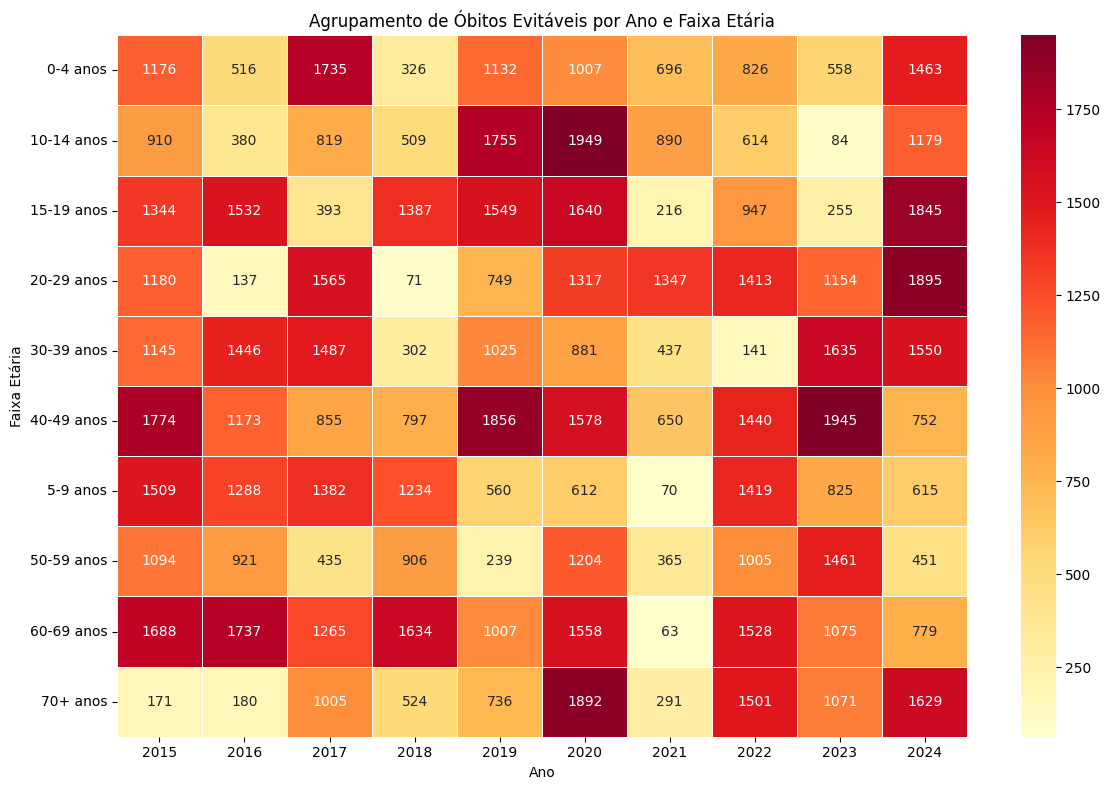

In [6]:
# Grafico do Agrupamento

pivot_table = df.pivot_table(
    values = 'Óbitos por Causas Evitáveis',
    index = 'Faixa Etária',
    columns = 'Ano',
    aggfunc = 'sum'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table,
            annot=True,
            fmt='d',
            cmap='YlOrRd',
            linewidths=0.5)
plt.title('Agrupamento de Óbitos Evitáveis por Ano e Faixa Etária')
plt.tight_layout()
plt.show()

In [11]:
# Destaques para possíveis causas (utlizando padrões sugestivos por faixa etária)

padroes_causas = {
    '0-4 anos': 'Doenças infantis, má-formação, infecções',
    '5-9 anos': 'Acidentes domésticos, afogamento, infecções',
    '10-14 anos': 'Acidentes, violência, afogamento',
    '15-19 anos': 'Acidentes de trânsito, violência, suicídio',
    '20-29 anos': 'Acidentes de trânsito, violência, overdose',
    '30-39 anos': 'Doenças cardiovasculares, acidentes, violência',
    '40-49 anos': 'Doenças cardiovasculares, câncer, diabetes',
    '50-59 anos': 'Doenças cardiovasculares, câncer, diabetes',
    '60-69 anos': 'Doenças cardiovasculares, câncer, diabetes',
    '70+ anos': 'Quedas, pneumonia, complicações pós-cirúrgicas'
}

print('Padrões Sugestivos por faixa etária: \n')
for faixa, causa_sugerida in padroes_causas.items():
  media_obitos = df[df['Faixa Etária'] == faixa]['Óbitos por Causas Evitáveis'].mean()
  print(f"L {faixa}: {causa_sugerida} (Média: {media_obitos: .0f} óbitos/ano)")

Padrões Sugestivos por faixa etária: 

L 0-4 anos: Doenças infantis, má-formação, infecções (Média:  944 óbitos/ano)
L 5-9 anos: Acidentes domésticos, afogamento, infecções (Média:  951 óbitos/ano)
L 10-14 anos: Acidentes, violência, afogamento (Média:  909 óbitos/ano)
L 15-19 anos: Acidentes de trânsito, violência, suicídio (Média:  1111 óbitos/ano)
L 20-29 anos: Acidentes de trânsito, violência, overdose (Média:  1083 óbitos/ano)
L 30-39 anos: Doenças cardiovasculares, acidentes, violência (Média:  1005 óbitos/ano)
L 40-49 anos: Doenças cardiovasculares, câncer, diabetes (Média:  1282 óbitos/ano)
L 50-59 anos: Doenças cardiovasculares, câncer, diabetes (Média:  808 óbitos/ano)
L 60-69 anos: Doenças cardiovasculares, câncer, diabetes (Média:  1233 óbitos/ano)
L 70+ anos: Quedas, pneumonia, complicações pós-cirúrgicas (Média:  900 óbitos/ano)


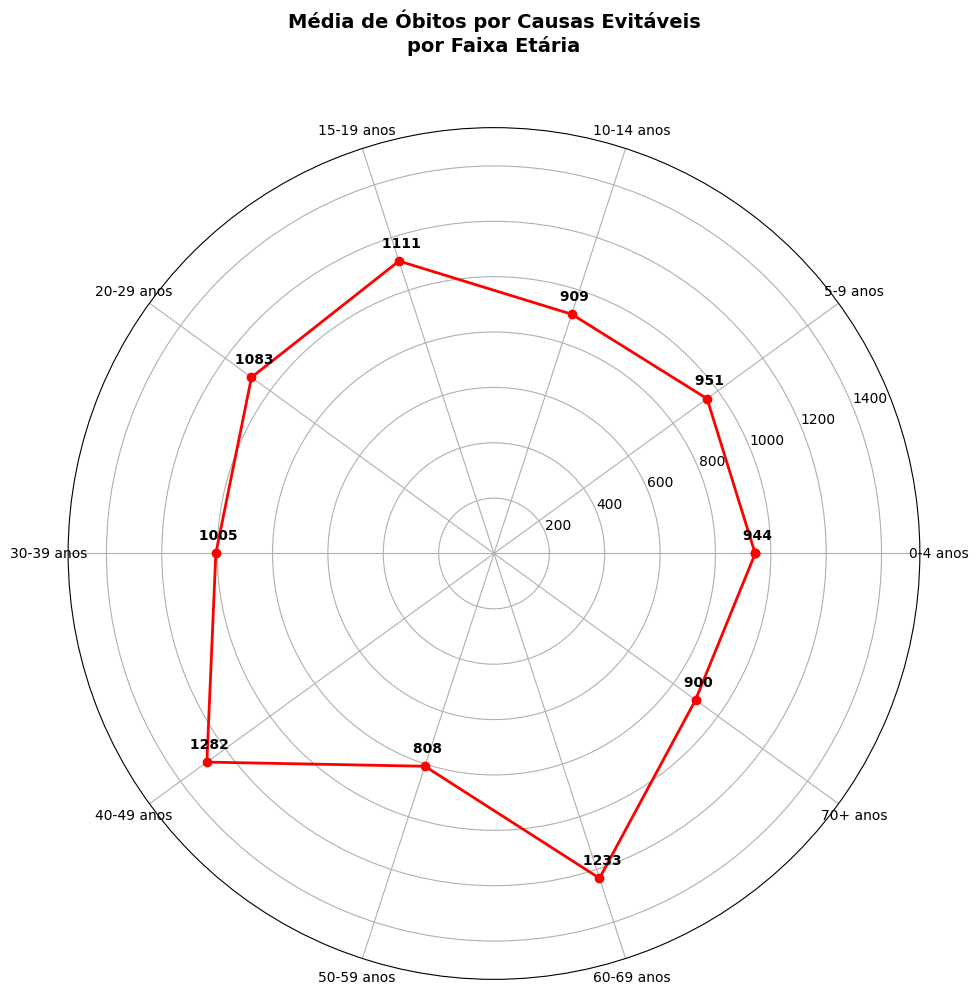

In [14]:
# Gráfico de média de óbitos por causas evitáveis por faixa etária

faixa_etarias = list(padroes_causas.keys())
medias_obitos = []

for faixa in faixa_etarias:
  media = df[df['Faixa Etária'] == faixa]['Óbitos por Causas Evitáveis'].mean()
  medias_obitos.append(media)

categorias = faixa_etarias
N = len(categorias)

angulos = [n / float(N) * 2 * pi for n in range(N)]
angulos += angulos[:1]

valores = medias_obitos
valores += valores[:1]

fig, ax = plt.subplots(figsize=(10, 10),
                       subplot_kw=dict(projection='polar'))
ax.plot(angulos, valores, 'o-', linewidth=2, label='Média de Óbitos/Ano', color='red')
ax.set_xticks(angulos[:-1])
ax.set_xticklabels(categorias)
ax.set_ylim(0, max(medias_obitos) * 1.2)
ax.grid(True)

plt.title('Média de Óbitos por Causas Evitáveis\npor Faixa Etária',
          size=14,
          fontweight='bold',  y=1.08)

for angulos, valor, categoria in zip(angulos[:-1], medias_obitos, categorias):
  ax.annotate(f'{valor: .0f}', (angulos, valor), textcoords='offset points',
              xytext=(0,10), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [13]:
grupo_mais_vulneravel = df.groupby("Faixa Etária", as_index=False).agg({
    'Óbitos por Causas Evitáveis' : 'sum'
})

print(f'Grupos mais vulneráveis:\n\n{grupo_mais_vulneravel}')

Grupos mais vulneráveis:

  Faixa Etária  Óbitos por Causas Evitáveis
0     0-4 anos                         9435
1   10-14 anos                         9089
2   15-19 anos                        11108
3   20-29 anos                        10828
4   30-39 anos                        10049
5   40-49 anos                        12820
6     5-9 anos                         9514
7   50-59 anos                         8081
8   60-69 anos                        12334
9     70+ anos                         9000


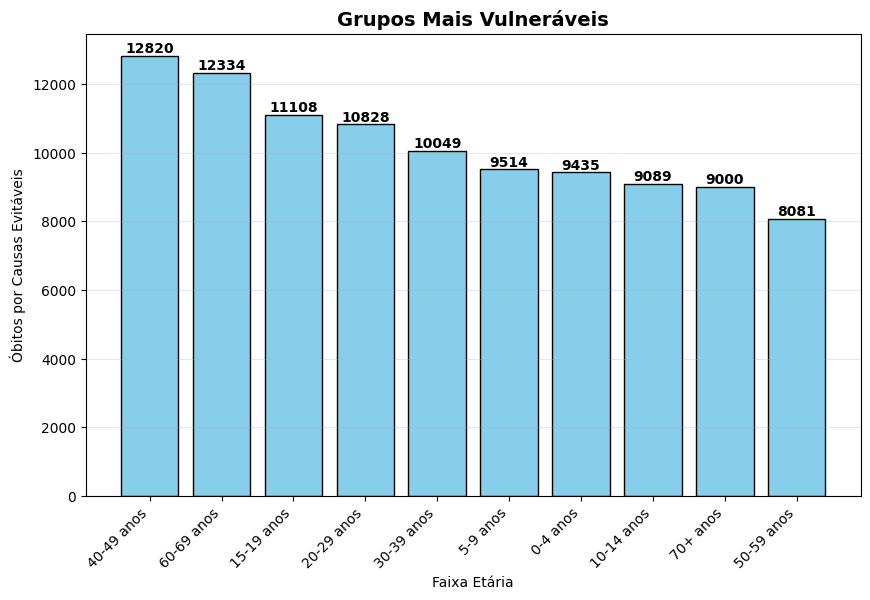

In [12]:
# Gráfico de grupos mais vulneráveis
df_ordenado = grupo_mais_vulneravel.sort_values('Óbitos por Causas Evitáveis', ascending=False)
plt.figure(figsize=(10, 6))
bars = plt.bar(df_ordenado['Faixa Etária'], df_ordenado['Óbitos por Causas Evitáveis'],
               color='skyblue', edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.0f}', ha='center', va='bottom', fontweight='bold')

plt.title('Grupos Mais Vulneráveis', fontsize=14, fontweight='bold')
plt.xlabel('Faixa Etária')
plt.ylabel('Óbitos por Causas Evitáveis')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.show()